# fanCE Tutorial

In this tutorial, we will use <span style="background-color: #F2F2F2">fanCE</span> to generate the star formation history, abundance evolutions, and mean stellar properties for the reference model in Gountanis et al. 2024. 

To run this tutorial, you will need the files <span style="background-color: #F2F2F2">fanCE.py</span>, <span style="background-color: #F2F2F2">fanCE_par.py</span>, <span style="background-color: #F2F2F2">fanCE_plot.py</span>, and <span style="background-color: #F2F2F2">fanCE_stellar.py</span>, which can be found on this [GitHub](https://github.com/nmgountanis/fanCE). <span style="background-color: #F2F2F2">fanCE.py</span> contains functions for analytic one-zone chemical evolution. <span style="background-color: #F2F2F2">fanCE_par.py</span> contains the default parameters used to describe the reference model in Gountanis et al. 2024. <span style="background-color: #F2F2F2">fanCE_plot.py</span> contains functions to produce select figures in Gountanis et al. 2024. <span style="background-color: #F2F2F2">fanCE_stellar.py</span> contains functions for determining light-weighted, log-averaged stellar ages and abundances. 


Let's import <span style="background-color: #F2F2F2">fanCE.py</span>, <span style="background-color: #F2F2F2">fanCE_par.py</span>, <span style="background-color: #F2F2F2">fanCE_plot.py</span>, <span style="background-color: #F2F2F2">fanCE_stellar.py</span> and a few other modules we'll need:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fanCE import *
import fanCE_par as p
from fanCE_plot import *
from fanCE_stellar import *

## Star Formation History and Gas Abundance Evolution

We will begin by generating star formation histories and gas abundance evolutions of [O/H], [Mg/H], [Fe/H], [O/Fe], and [Mg/Fe] using the function <span style="background-color: #F2F2F2">fance( )</span>. 

<span style="background-color: #F2F2F2">fance( )</span> implements a two-parameter star formation history $\propto(1-e^{-t/\tau_1})\cdot e^{-t/\tau_2}$, which rises linearly on a timescale $\tau_1$ and then falls exponentially on a timescale $\tau_2$ for $\tau_1>\tau_2>0$.

In [9]:
t,sfr,OH,MgH,FeH,OFe,MgFe = fance(p.tstart,p.t0,p.dtout,p.mocc,p.mmgcc,p.mfecc,p.fret,p.mfeIa,p.r,p.SolarO,
                                  p.SolarMg,p.SolarFe,p.tauIa,p.tdmin,p.eta,p.tauStar,p.tau1,p.tau2)

We can plot the star formation history using <span style="background-color: #F2F2F2">plotSFH( )</span>. Here, the star formation history is normalized to give the galaxy's stellar mass formed per Gyr:

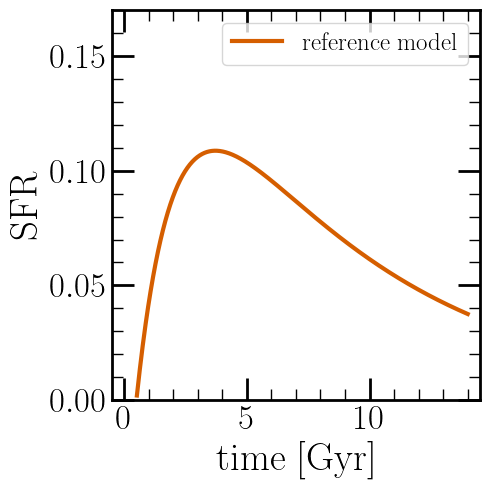

In [3]:
plotSFH(t,sfr,p.dtout,"reference model")

We can plot [Mg/H], [Fe/H], and [Mg/Fe] versus time using <span style="background-color: #F2F2F2">plotGas( )</span>. [O/H] and [O/Fe] are not included in <span style="background-color: #F2F2F2">plotGas( )</span> since they have identical evolution tracks to [Mg/H] and [Mg/Fe], respectively.

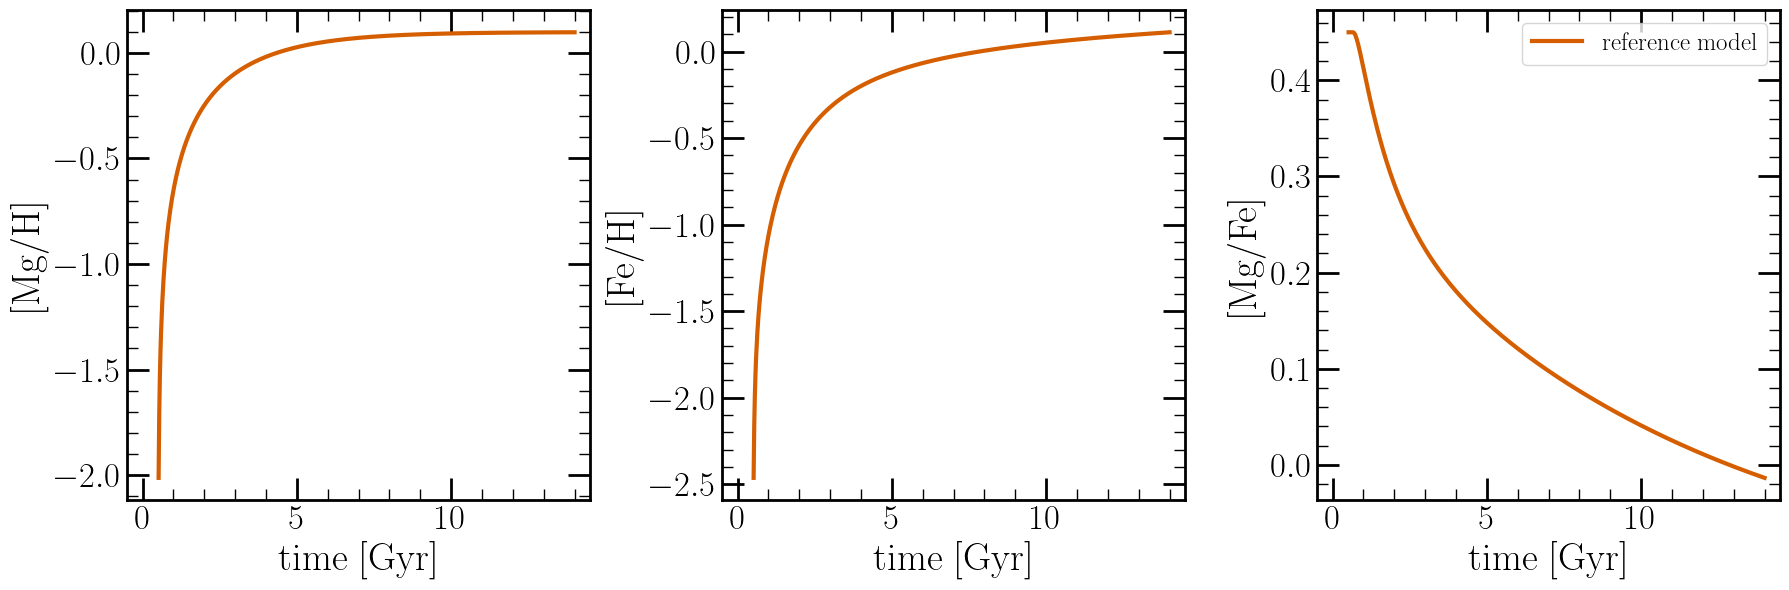

In [4]:
plotGas(t,MgH,FeH,MgFe,"reference model")

## Mean Age and Stellar Abundance Evolution

Now we will use the star formation history and gas abundances generated by <span style="background-color: #F2F2F2">fance( )</span> to determine the light-weighted, log-averaged stellar age and abundances.

Let's start by computing the light-weighting function using <span style="background-color: #F2F2F2">weight( )</span>. Setting <span style="background-color: #F2F2F2">$t_0=0$</span> returns <span style="background-color: #F2F2F2">lightweight=1</span>, corresponding to mass-weighting.

In [5]:
lightweight = weight(t,p.t0)

The function <span style="background-color: #F2F2F2">stellar( )</span> returns $\langle$age$\rangle$, $\langle$[O/H]$\rangle$, $\langle$[Mg/H]$\rangle$, $\langle$[Fe/H]$\rangle$, $\langle$[O/Fe]$\rangle$, $\langle$[Mg/Fe]$\rangle$:

In [6]:
mean_age,OHStar,MgHStar,FeHStar,OFeStar,MgFeStar=stellar(t,p.t0,sfr,lightweight,OH,MgH,FeH,OFe,MgFe)

We can plot $\langle$age$\rangle$, [Mg/H], $\langle$[Mg/H]$\rangle$, [Mg/Fe], and $\langle$[Mg/Fe]$\rangle$ versus time as well as $\langle$[Mg/H]$\rangle$ and $\langle$[Mg/Fe]$\rangle$ versus $\langle$age$\rangle$ using <span style="background-color: #F2F2F2">plotStellar( )</span>. [O/H], $\langle$[O/H]$\rangle$, [O/Fe], and $\langle$[O/Fe]$\rangle$ are not included in <span style="background-color: #F2F2F2">plotStellar( )</span> since they have identical evolution tracks to [Mg/H], $\langle$[Mg/H]$\rangle$, [Mg/Fe], and $\langle$[Mg/Fe]$\rangle$, respectively.

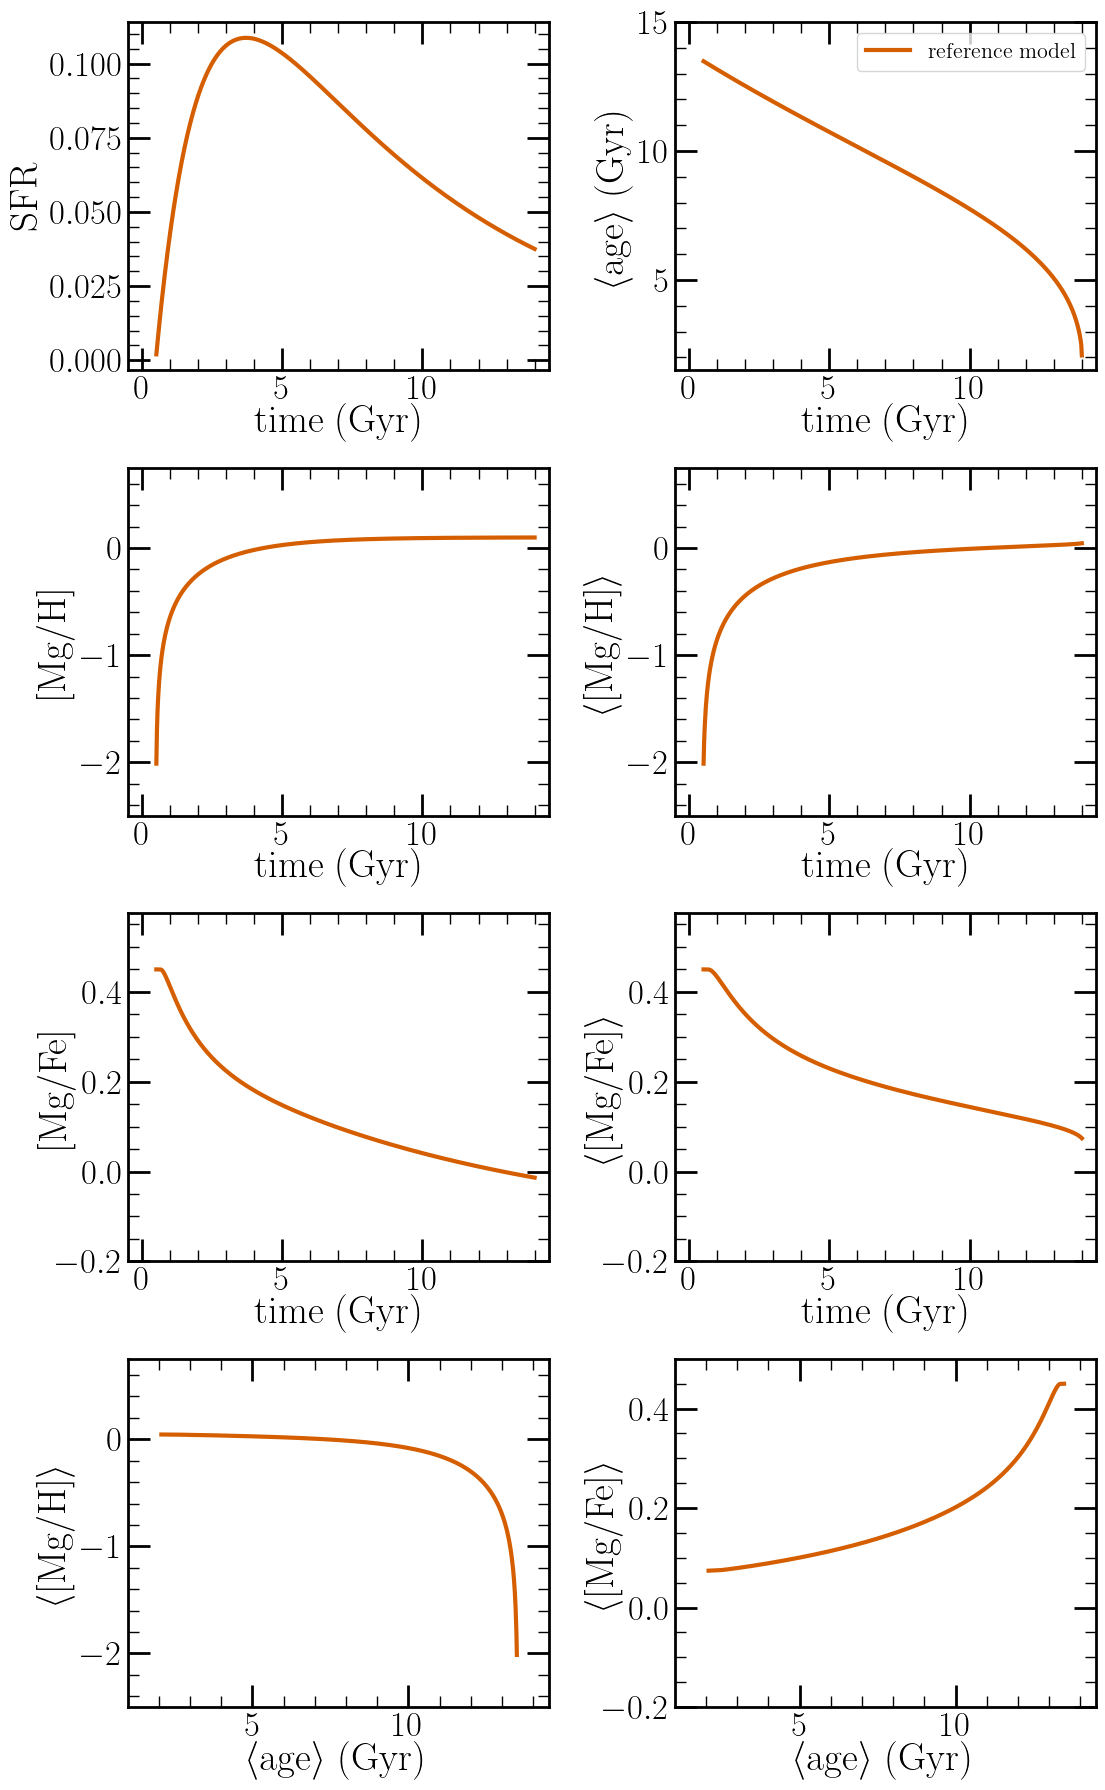

In [7]:
plotStellar(t,sfr,p.dtout,mean_age,MgH,MgFe,MgHStar,MgFeStar,"reference model")